# Extracting both the pKa and buridness data

In the following example we will be using TrIPP to determine the p*K*<sub>a</sub> values of the hen egg-white lysozyme (HEWL; PDB ID: 1AKI). Two replicas were included in this tutorial. The files can be found in the files folder and contain a PDB file of the minimised structure of the lysozyme and two XTC files of the 300 ns trajectory sampled every 100 ps. Water have been removed in the trajectory.

#### The `Trajectory` class 

The main class of TrIPP is the `Trajectory`. It contains the iterator that is able to iterate through the trajectory and extract p*K*<sub>a</sub> values using PROPKA3. The `Trajectory` class requires three arguments: 

- `trajectory_file`: `str`. The path of the file containing the trajectory. The same formats permited by MDAnalysis can be used. 

- `topology_file`: `str`. The path of the file containing the topology. The same formats allowed by MDAnalysis can be used. 

- `cpu_core_number`: `int`, `default=-1`. The number of cpu cores used for the calculation. If cpu_core_number=-1, all available cores are used. 

The `Trajectory` class contains a single method called `run`, which runs the iterator. The `run` method takes the following arguments: 

- `output_file`: `str`. The name of the output CSV file. 

- `extract_buriedness_data`: `bool`. If `True` both data on buriedness and p*K*<sub>a</sub> will be extracted. If `False` only p*K*<sub>a</sub> data will be extracted. 

- `chain`: `str`. Chain ID of target protein. If no chain ID is found in the `topology_file`, it is set to 'A'. 

- `mutation`: `int` or `list` of `int`, `default=None`. Allows for the *pseudomutation* of residues to alanine. The residue number or list of residue numbers (MDAnalysis resid) can be provided. TrIPP will run on the trajectory with the side chains of the selected residues replaced as alanine. By comparing the *pseudomutated* trajectory to the unchanged, it is possible to understand the contributions of the *pseudomutated* residues to the p*K*<sub>a</sub> of the residue of interest. 

- `disulphide_bond_detection`: `bool`, `default=True`. If `True` detects all disulphide bonds present in the topology file and does not provide p*K*<sub>a</sub> values for them. 

- `optargs`: `list`, `default=[]`. PROPKA prediction can be run with optional arguments as indicated in their documentation. Each flag is string separated by a comma. For example, `["-k","--pH=7.2"]` keeps the proton in your topology and setting pH 7.2 for ie: stability calculations, respectively.

Running the calculation produces a CSV file for each trajectory containing the p*K*<sub>a</sub> values (named 'output_file'_pka.csv) and one containing the buridness data (named 'output_file'_buridness.csv), where each row corresponds to a timestep and each column to a residue. 

Note that you might see a message from PROPKA about "Missing atoms or failed protonation for ASN  46 A (AMD) -- please check the structure". Our understanding to this is that PROPKA has a pre-defined number of interactions for different groups (https://propka.readthedocs.io/en/latest/_modules/propka/group.html). The conformation of the residue would change throughout the trajectory. Hence, the number of interactions is not definite.

In [1]:
from tripp import Trajectory

file_directory = 'files' 
output_directory = 'output' 

topology_file = f'{file_directory}/1AKI_minstr.pdb' #topology, can be any format readable by MDAnalysis

for idx in range(1,3): 
    trajectory_file = f'{file_directory}/1AKI_md{idx}_300ns.xtc' #Trajectory, can be any format readable by MDAnalysis
    output_prefix = f'1AKI_md{idx}' 
    final_directory = f'{output_directory}/{output_prefix}' #A new directory will be created using the output_prefix as the name of the directory
    
    TrIPP_Traj = Trajectory(trajectory_file=trajectory_file, 
                            topology_file=topology_file, 
                            cpu_core_number=-1) #Setting the argument cpu_number to -1 allows for the use of all available CPUs 
    TrIPP_Traj.run(output_directory = final_directory,
                   output_prefix = output_prefix, 
                   extract_buriedness_data=True, #If this is set to False, only pKa data will be extracted, else both pKa and buriedness data will be extracted 
                   chain='A', 
                   mutation=None, 
                   disulphide_bond_detection=True,
                   optargs=[]) #Automatically detects disulphide bonds and removes the cysteines from pKa calculation 

/Users/kafuman/Ivan/TrIPP/TrIPP/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
All resnames can be recognised by PROPKA.
PROPKA prediction proceeding...
Cysteines involved in disulphide bonds: CYS6, CYS30, CYS64, CYS76, CYS80, CYS94, CYS115, CYS127.
pKa will not be calculated for these cysteines.
Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
All resnames can be recognised by PROPKA.
PROPKA prediction proceeding...


Missing atoms or failed protonation for ASN  27 A (AMD) -- please check the structure
Group (AMD) for   415-  CG    27-ASN (A) [  34.720   45.140   38.560] C
Expected 3 interaction atoms for acids, found:
               417- ND2    27-ASN (A) [  35.230   44.950   39.650] N
                 0- HD2    27-ASN (A) [  35.877   44.950   40.426] H
Expected 1 interaction atoms for bases, found:
               416- OD1    27-ASN (A) [  33.630   44.640   38.510] O
Missing atoms or failed protonation for ASN 106 A (AMD) -- please check the structure
Group (AMD) for  1572-  CG   106-ASN (A) [  25.120   50.670   38.470] C
Expected 3 interaction atoms for acids, found:
              1574- ND2   106-ASN (A) [  24.060   51.190   38.060] N
                 0- HD2   106-ASN (A) [  23.373   51.848   37.721] H
Expected 1 interaction atoms for bases, found:
              1573- OD1   106-ASN (A) [  24.970   49.530   38.690] O


Cysteines involved in disulphide bonds: CYS6, CYS30, CYS64, CYS76, CYS80, CYS94, CYS115, CYS127.
pKa will not be calculated for these cysteines.


Two new directories (with the name you set for the `output_prefix`) are created in the output directory. Each contains a `output_prefix`_pka.csv, `output_prefix`_buriedness.csv file, and a `output_prefix`.log file with all the parameters that is chosen for the calculation. A quick pKa statstics (Mean,Median,Standard Deviation) is also included in the log file.

It is often the case that the deviation of the p*K*<sub>a</sub> value of a residue in a protein from its model value in solution is important. It is affected by interactions with the environments (electrostatic, hydrogen bonding, apolar etc). TrIPP offers a function to determine the deviation for every residue compared to its model value during the trajectory. 

After calculating the p*K*<sub>a</sub> values of the protein residues using the `Trajectory.run()` method, it is possible to use the `analysis.calculate_difference_to_model()` function to calculate the difference to the model value for each residue. It takes a sinlge input: 

- `output_file`: `str`, must be the same `output_file` used in the `Trajectory.run()` method. 

This function produces a CSV file for each trajectory in the same directory as the original p*K*<sub>a</sub> file named 'output_file'_difference_to_model.csv. 

In [2]:
from tripp.analysis import calculate_difference_to_model 

output_directory = 'output' 

for idx in range(1,3):
    output_prefix = f'1AKI_md{idx}'
    final_directory = f'{output_directory}/{output_prefix}'
    calculate_difference_to_model(output_file=f'{final_directory}/1AKI_md{idx}') 

Once the p*K*<sub>a</sub> values and differences to model values are calculated for the trajectory, their distribution can be visualized. This allows us to determine, which residues are more likely to change protonation state and diverge the most from model values. 

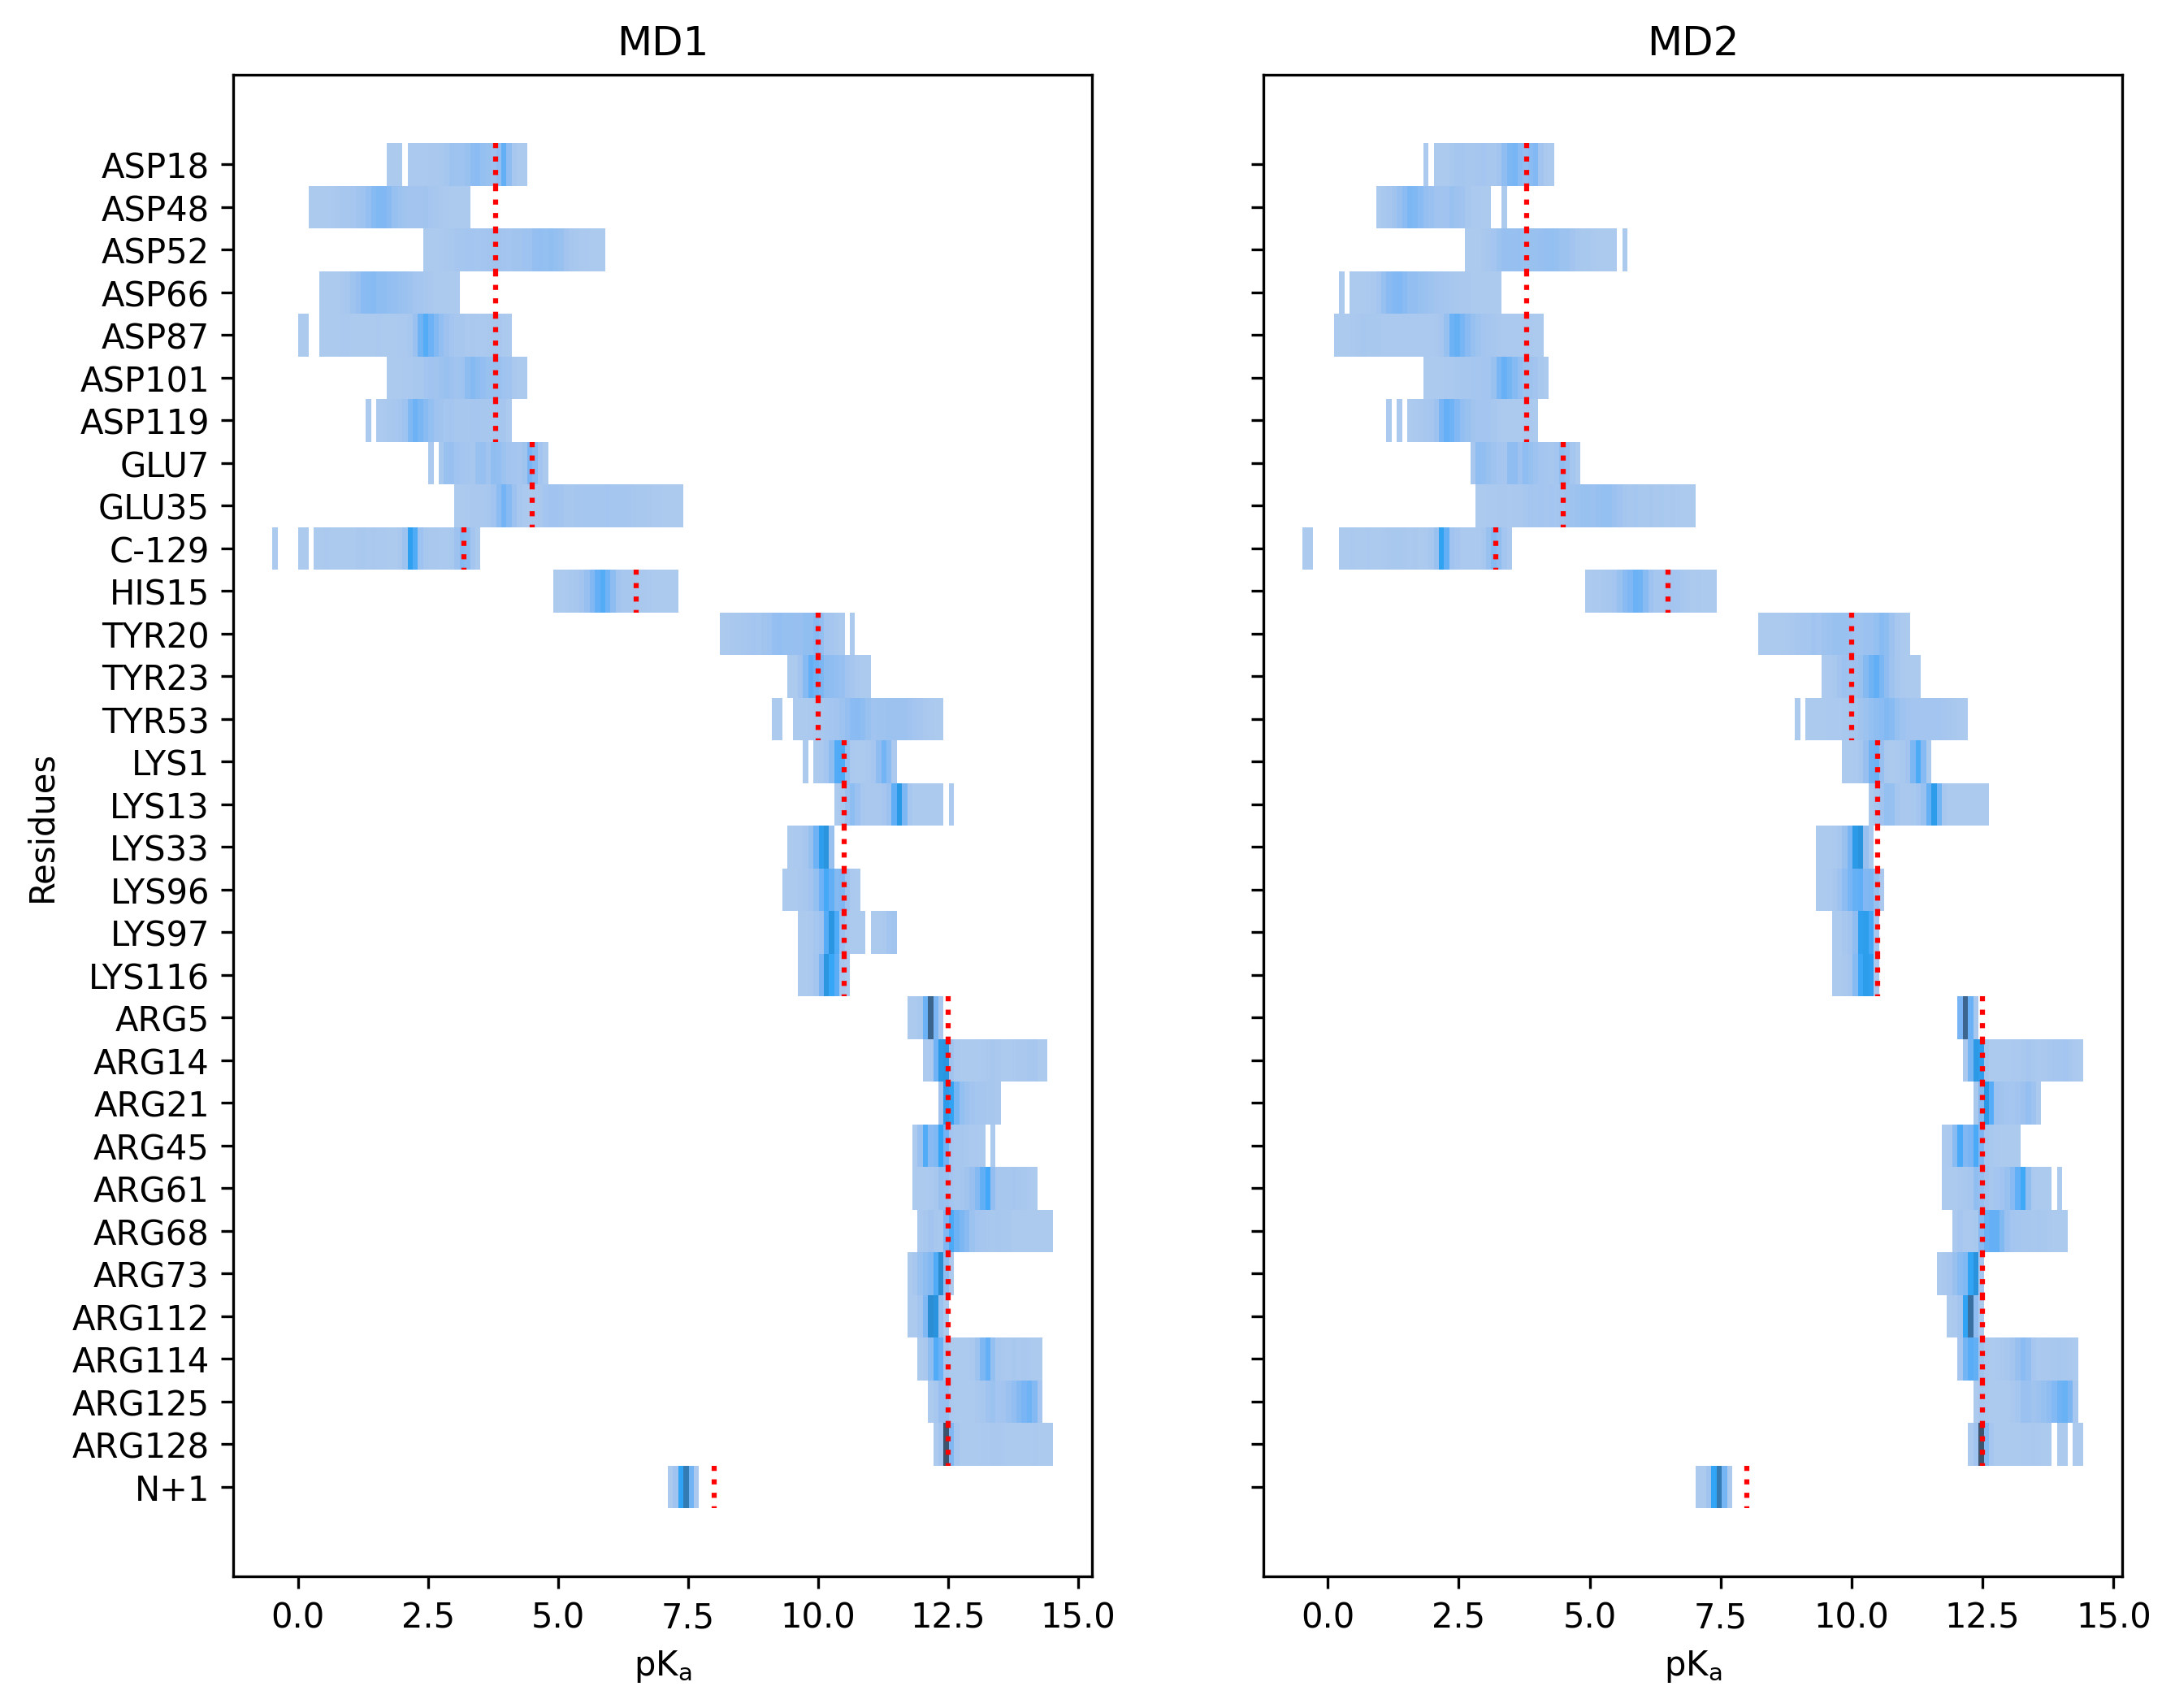

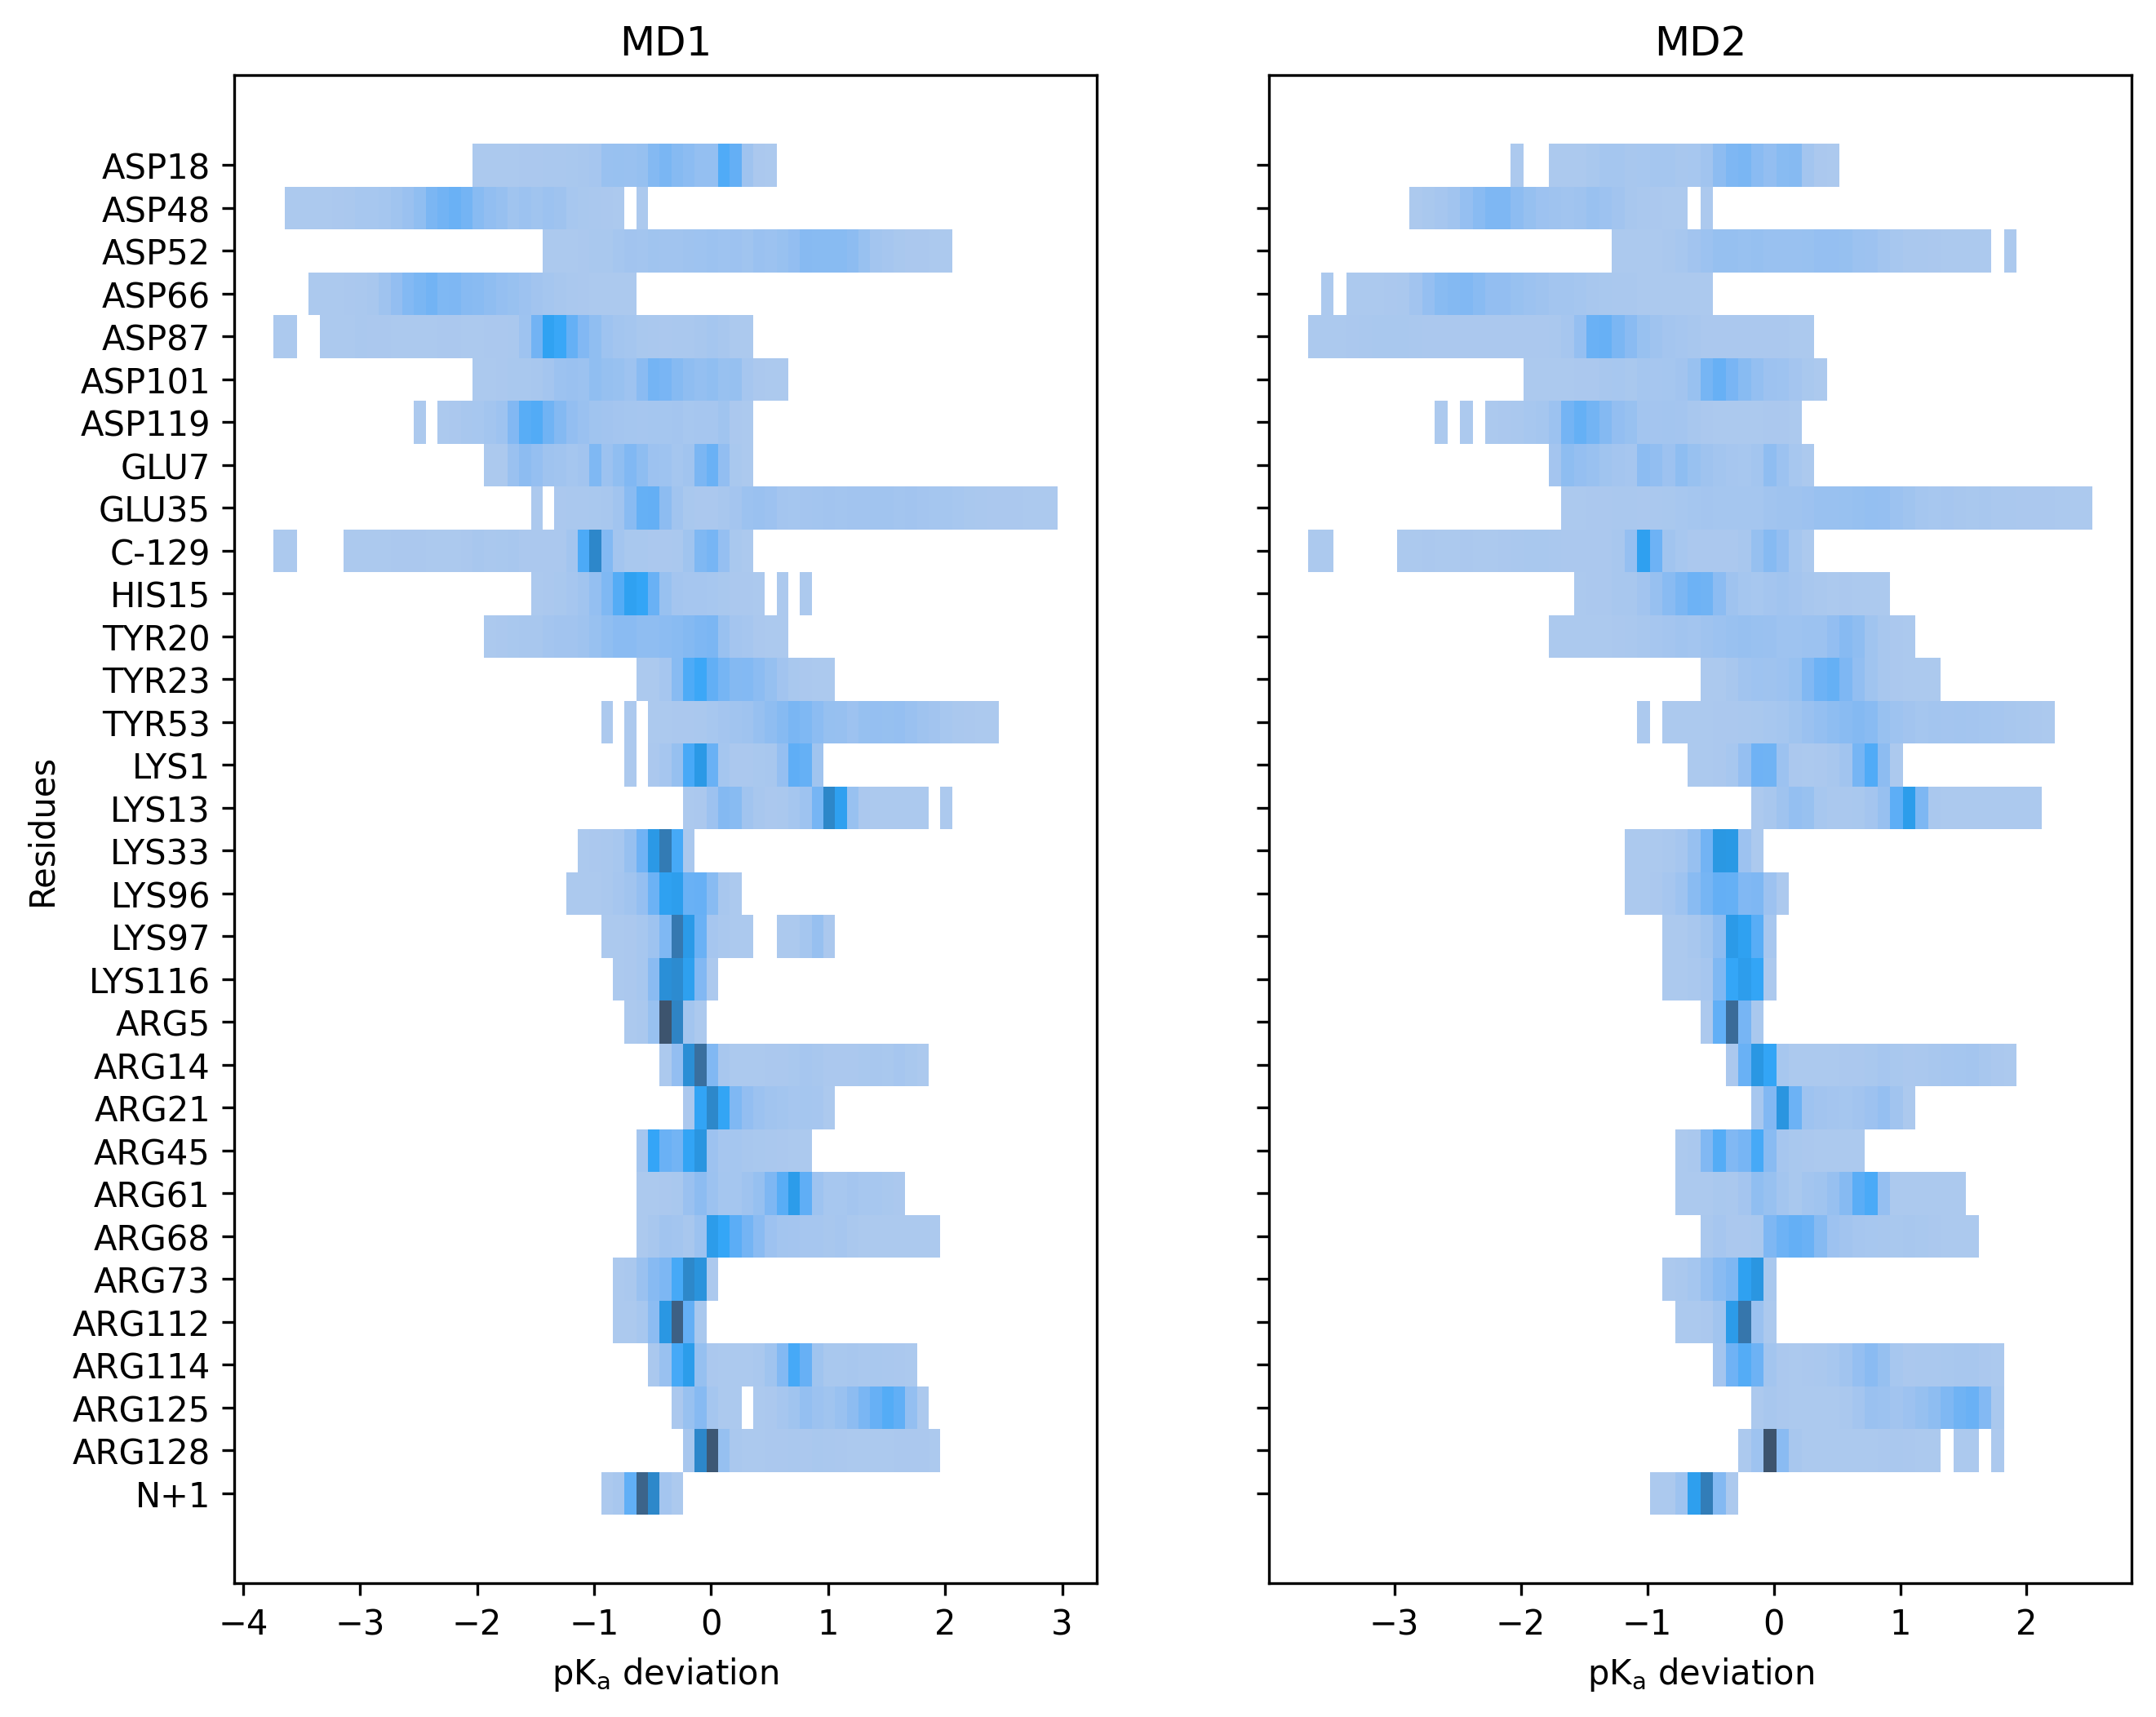

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tripp._model_pka_values_ import model_pka_values

output_directory = 'output' 

fig, ax = plt.subplots(1,2, figsize=(10, 8),dpi=300, sharey=True) 

#Plot histogram showing the pKa values
for idx in range(1,3):
    output_prefix = f'1AKI_md{idx}'
    final_directory = f'{output_directory}/{output_prefix}'
    
    df_md = pd.read_csv(f'{final_directory}/1AKI_md{idx}_pka.csv') 
    df_melt = df_md.melt(id_vars='Time [ps]', var_name='Residues', value_name='pKa value') 
    sns.histplot(data=df_melt, x='pKa value', y='Residues', ax=ax[idx-1], binwidth=0.1)
    ax[idx-1].set(xlabel=r'pK$_{\rm a}$')
    ax[idx-1].set_title(f'MD{idx}')
    #Adding model pKa value to each row
    for ytick, residue in enumerate([i[:3] for i in df_melt['Residues'].unique()]):
        if 'N+' in residue:
            ax[idx-1].vlines(model_pka_values['NTR'],ytick-0.5,ytick+0.5,colors='red',linestyles='dotted')
        elif 'C-' in residue:
            ax[idx-1].vlines(model_pka_values['CTR'],ytick-0.5,ytick+0.5,colors='red',linestyles='dotted')
        else:
            ax[idx-1].vlines(model_pka_values[residue],ytick-0.5,ytick+0.5,colors='red',linestyles='dotted')
    

fig, ax = plt.subplots(1,2, figsize=(10, 8),dpi=300, sharey=True) 

#Plot histogram showing the deviation from the model pKa values 
for idx in range(1,3): 
    output_prefix = f'1AKI_md{idx}'
    final_directory = f'{output_directory}/{output_prefix}'
    
    df_md = pd.read_csv(f'{final_directory}/1AKI_md{idx}_difference_to_model.csv') 
    df_melt = df_md.melt(id_vars='Time [ps]', var_name='Residues', value_name='pKa value deviation') 
    sns.histplot(data=df_melt, x='pKa value deviation', y='Residues', ax=ax[idx-1], binwidth=0.1)
    ax[idx-1].set(xlabel=r'pK$_{\rm a}$ deviation')
    ax[idx-1].set_title(f'MD{idx}')

The above figure shows the distribution of the p*K*<sub>a</sub> value deviation for the three replicas. 

The acidic residues ASP52 and GLU35 are of particular interest since they show an upshift of their p*K*<sub>a</sub> values. The model p*K*<sub>a</sub> values for aspartate and glutamate residues are 3.8 and 4.5, respectively. An increase of their p*K*<sub>a</sub> due to the changes in local environement in the protein, would allow for their protonation. These two residues are involved in the catalytic mechanism of a glycosidic bond in the HEWL. One can therefore focus on these two residues and determine their perturbation by the local environement.

# Visualization

TrIPP also offers the ability to visualize p*K*<sub>a</sub> values on the structure of the protein. This is done by using the `Visualization` class. 

The `Visualization` class takes three arguments: 

- `structure`: `str`. The file path of the structure that is going to be used for visualisation. 

- `pka_file`: `str` or `list`. The file path or a list of file paths of the CSV file containing the p*K*<sub>a</sub> to visualize. 

- `correlation_file`: `str`. The file path or a list of file paths of the CSV file containing the correlation . 

The `Visualization` class contains the method `gen_pse`, which is called to generate a PDB file containing the p*K*<sub>a</sub> values or correlation coefficient in the B-factor column and a PyMOL session file. 

- `pymol_path`: `str`. Path to the PyMOL software binary needs to be specified. The script will spawn a subprocess shell to run a python script in PyMOL. 

- `output`: `str`. Path to output file. The name of the ouput file will be extended depending on the `coloring_method` argument. 

- `NtermCap_atom_name`: `str`, `default='N H1 H2 H3'`. The atom name for the first N-terminal backbone amine group. Note the atom name may vary for different system. Please check the atom name for your system.

- `CtermCap_atom_name`: `str`, `default='C OC1 OC2'`. The atom name for the last C-terminal backbone carbonyl group. Note the atom name may vary for different system. Please check the atom name for your system.

- `coloring_method`: `'mean'`,`'difference_to_model_value'`,`'correlation'`, `int`, or `float`, `default='mean'`. Type of method used to assign p*K*<sub>a</sub> value or correlation coefficient to each residue. 

    - If `'mean'`, the mean of all p*K*<sub>a</sub> values in the `pka_file` for all residues is used. 

    - If `'difference_to_model_value'`, the mean difference of all p*K*<sub>a</sub> values in the `pka_file` to the model value of the amino acid in solution is used. 

    - If `'correlation'`, the correlation coefficient between the p*K*<sub>a</sub> of each ionisable residue and a variable that a user might have investigated. For example, the projections of $C_\alpha$ coordinates of a trajectory on a given principal component. 

    - If `int` or `float`, a specific timestep is selected for visualisation. 

- `lower limit`: `int` or `float`, `default=0`. Lower limit used to colour the residues in the PyMOL session. Any value below the limit is coloured using the lowest end of the color gradient used. 

- `upper limit`: `int` or `float`, `default=14`. Upper limit used to colour the residues in the PyMOL session. Any value above the limit is coloured using the highest end of the color gradient used. 

- `color_palette`: `str`, `default='red_white_blue'`. Colour palettes used to colour the residues in the PyMOL session according to the p*K*<sub>a</sub> value. The default is set to `'red_white_blue'`. See [PyMOL spectrum](https://pymolwiki.org/index.php/Spectrum) for allowed color palettes. Three colors palette is suggested. 

We will use both p*K*<sub>a</sub> CSV files generated for trajectories MD1 and MD2 to generate a PyMOL session for the mean p*K*<sub>a</sub> value of the residues mapped onto the initial minimised structure of HEWL. 

In [1]:
from tripp import Visualization

file_directory = 'files' 
output_directory = 'output' 

topology_file = f'{file_directory}/1AKI_minstr.pdb' 
pymol_path = '/Applications/PyMOL.app/Contents/MacOS/MacPyMOL' #Make sure you specify where your pymol installation is 
pka_files = [f'{output_directory}/1AKI_md1/1AKI_md1_pka.csv', 
             f'{output_directory}/1AKI_md2/1AKI_md2_pka.csv']
TrIPP_Vis = Visualization(structure=topology_file, 
                          pka_file=pka_files) 

TrIPP_Vis.gen_pse(pymol_path=pymol_path, 
                    output=f'{output_directory}/1AKI_all_md_pka',
                    NtermCap_atom_name='N H1 H2 H3',
                    CtermCap_atom_name='C OC1 OC2',
                    coloring_method='mean', 
                    lower_limit=0, 
                    upper_limit=14, 
                    color_palette='red_white_blue')

/Users/kafuman/Ivan/TrIPP/TrIPP/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
output/1AKI_all_md_pka_mean.pdb
 PyMOL(TM) 3.0.1 - Incentive Product
 Copyright (C) Schrodinger, LLC
 
 This Executable Build integrates and extends Open-Source PyMOL.
 Detected 12 CPU cores.  Enabled multithreaded rendering.


One can also generate a PyMOL session for the difference of the mean p*K*<sub>a</sub> to the model p*K*<sub>a</sub> value

In [3]:
TrIPP_Vis = Visualization(structure=topology_file, 
                          pka_file=pka_files) 

TrIPP_Vis.gen_pse(pymol_path=pymol_path, 
                    output=f'{output_directory}/1AKI_all_md_pka',
                    NtermCap_atom_name='N H1 H2 H3',
                    CtermCap_atom_name='C OC1 OC2',
                    coloring_method='difference_to_model_value', 
                    lower_limit=-3, 
                    upper_limit=2, 
                    color_palette='red_white_blue') 

Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
output/1AKI_all_md_pka_difference_to_model_value.pdb
 PyMOL(TM) 3.0.1 - Incentive Product
 Copyright (C) Schrodinger, LLC
 
 This Executable Build integrates and extends Open-Source PyMOL.
 Detected 12 CPU cores.  Enabled multithreaded rendering.


# Clustering trajectories based on p*K*<sub>a</sub> values 

Visualising the p*K*<sub>a</sub> values of the two residues allows us to see the relationship between the two values. 

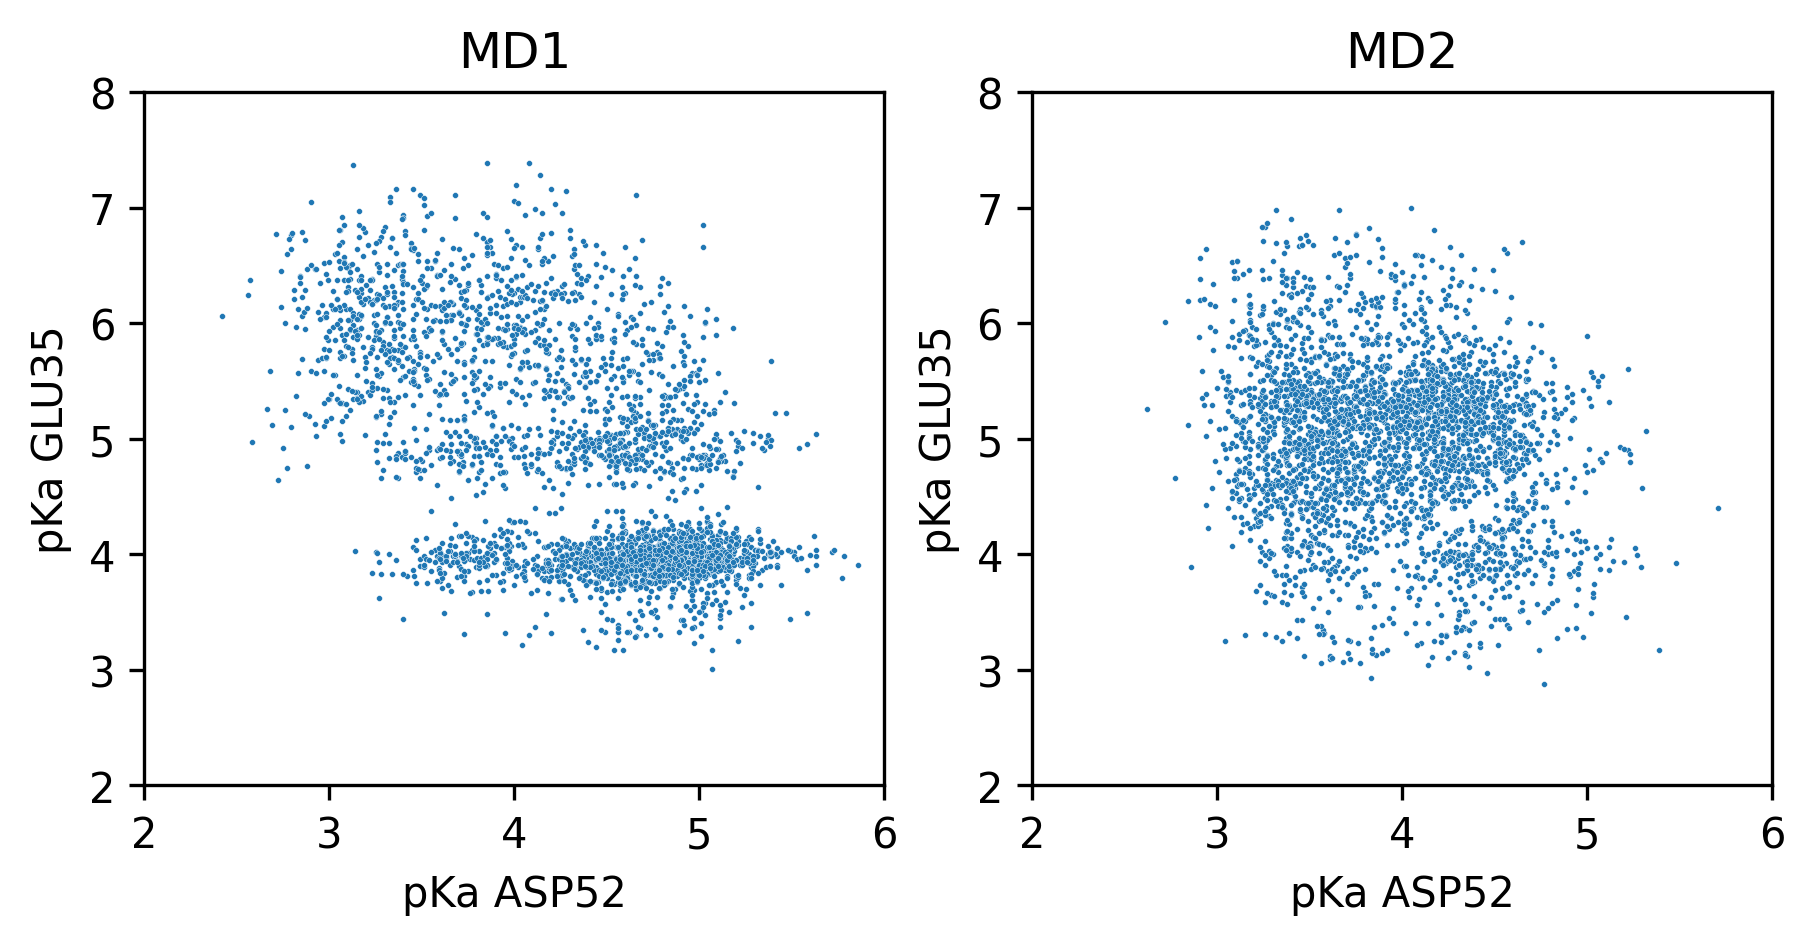

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize=(7,3),dpi=300)

for idx in range(1,3):
    output_prefix = f'1AKI_md{idx}'
    final_directory = f'{output_directory}/{output_prefix}'
    df_md = pd.read_csv(f'{final_directory}/1AKI_md{idx}_pka.csv') 
    sns.scatterplot(data=df_md, x='ASP52', y='GLU35', ax=ax[idx-1], s=2) 
    ax[idx-1].set_xlim(2,6) 
    ax[idx-1].set_ylim(2,8) 
    ax[idx-1].set_xlabel('pKa ASP52') 
    ax[idx-1].set_ylabel('pKa GLU35') 
    ax[idx-1].set_title(f'MD{idx}') 

The scatterplot of the p*K*<sub>a</sub> values of GLU35 and ASP52 shows two distinct populations of points, particularly in MD1 and less in MD2.

The second class of TrIPP is the `Clustering` class. It allows for the clustering of trajectory frames using the p*K*<sub>a</sub> values of selected residues alongside the buriedness and charge center distances (if selected). 

The `Clustering` class takes the following arguments: 

- `trajectory_file`: `str` or `dict`. When `str`, it is the path of the file containing the trajectory. The same formats permited by MDAnalysis can be used. When `dict`, the clustering is done using multiple trajectories specified in a dictionary, where the name of each trajectory is used as a key and the path as an object: {'MD1' : 'file1', 'MD2' : 'file2', ...}. The same topology file is used for all trajectories. 

- `topology_file`: `str`. Path to the topology file. The same formats allowed by MDAnalysis can be used. 

- `pka_file`: `str` or `list`. When `str`, it is the path of the CSV file containing the p*K*<sub>a</sub> values generated by the `Trajectory` class using the same trajectory file and topology file selected for the clustering. When `list`, it is a list of paths of the CSV files corresponding to the dictionary selected for `trajectory_file`. When selecting a list of files for the `pka_file` argument the order of the files needs to be the same as in the `trajectory_file` dictionary. 

- `residues`: `list`. List of residues for which the clustering will be done. The residues have a p*K*<sub>a</sub> value assigned to them by PROPKA. 

- `log_file`: `str`. File name for the log file .

- `buriedness_file`: `str` or `list`, `default=None`. When `str`, it is the path of the CSV file containing the buriedness measurements generated by the `Trajectory` class using the same trajectory file and topology file selected for the clustering. When `list`, it is a list of paths of the CSV files corresponding to the dictionary selected for `trajectory_file`. When selecting a list of files for the `buriedness_file` argument the order of the files needs to be the same as in the `trajectory_file` dictionary. 

- `include_distances`: `bool`, `default=False`. If `True`, the relative positions (as distances between the charge centers) are used as additional features for the clustering. 

- `include_buriedness`: `bool`, `default=False`. If `True`, the buriedness measurements are used as additional features for the clustering. 

- `dimensionality_reduction`: `bool`, `default=False`. If `True`, dimensionality reduction is performed on the generated data (p*K*<sub>a</sub> values and if selected charge center distances) using PCA. The number of components is selected that described >=90% of the cummulative variance and the clustering is done on those components. 

The `Clustering` contains three methods corresponding to three different clustering algorithms: `kmedoids`, `gromos`, and `dbscan`. The choice of clustering algorithm depends on the data structure the clustering is performed on. In this case, we will be using the `kmedoids` method. It takes the following arguments: 

- `automatic`: `bool`, `default=False`. If `True` the clustering is run using various cluster numbers (defined by `max_clusters`). The silhouette score is determined at each iteration and the best number of clusters is chosen based on the highest silhouette score. 

- `n_clusters`: `int`, `default=8`. Number of clusters used for the clustering. Ignored if `automatic=True`. 

- `metric`, `method`, `init`, `max_iter`, `random_state` as found in [sklearn_extra.cluster.KMedoids](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html). 

- `max_clusters`: `int`, `default=20`. Max number of clusters to use when `automatic=True`. 

As a demonstration, we will cluster both trajectories and setting `automatic=True` to search for the optimal hyperparameter. The clustering will generate PDB structures corresponding to the cluster centroid. 

In [14]:
from tripp import Clustering 

file_directory = 'files' 
output_directory = 'output' 

topology_file = f'{file_directory}/1AKI_minstr.pdb' 

trajectory_files = {'MD1' : f'{file_directory}/1AKI_md1_300ns.xtc', 
                    'MD2' : f'{file_directory}/1AKI_md2_300ns.xtc'} 

pka_files = [f'{output_directory}/1AKI_md1/1AKI_md1_pka.csv', 
             f'{output_directory}/1AKI_md2/1AKI_md2_pka.csv'] 

TrIPP_Clust = Clustering(trajectory_file=trajectory_files, 
                         topology_file=topology_file, 
                         pka_file=pka_files, 
                         buriedness_file=None, 
                         residues=[35, 52], 
                         log_file=f'{output_directory}/1AKI_all_md', 
                         include_distances=False, 
                         include_buriedness=False,
                         dimensionality_reduction=False) 

TrIPP_Clust.kmedoids(automatic=True, 
                     max_clusters=20) 

Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
Clustering with 2 clusters produces an average silhouette score of 0.4647.
Clustering with 3 clusters produces an average silhouette score of 0.3895.
Clustering with 4 clusters produces an average silhouette score of 0.4343.
Clustering with 5 clusters produces an average silhouette score of 0.4157.
Clustering with 6 clusters produces an average silhouette score of 0.4078.
Clustering with 7 clusters produces an average silhouette score of 0.3928.
Clustering with 8 clusters produces an average silhouette score of 0.35.
Clustering with 9 clu

The clustering produces a log file containing the clustering details (1AKI_clean_all_md_KMedoids.log), one PDB file for each cluster containing the cluster centroid structure (1AKI_clean_all_md_KMedoids_C0.pdb and 1AKI_clean_all_md_KMedoids_C1.pdb) and one CSV file containing the clustering data alongside the p*K*<sub>a</sub> values (1AKI_clean_all_md_KMedoids_cluster.csv). Visualising the clustering results allows one to determine the quality of the clustering.  

<Axes: xlabel='ASP52', ylabel='GLU35'>

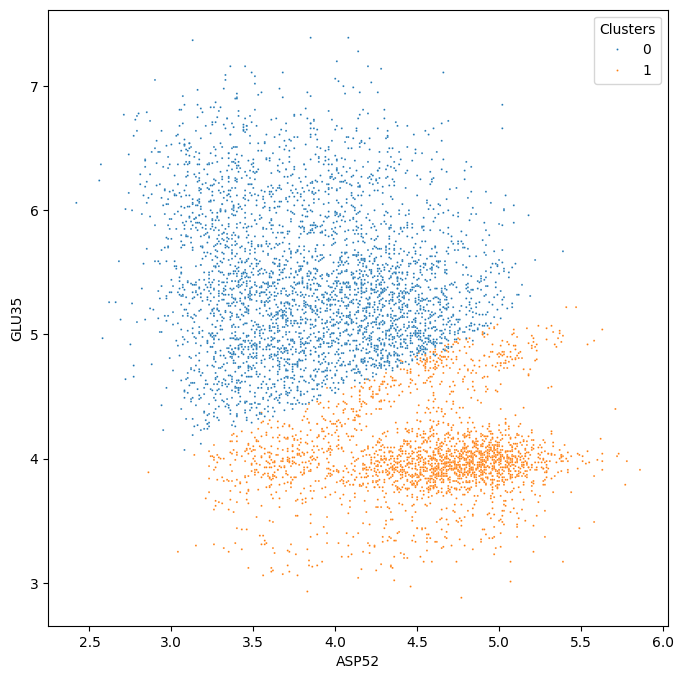

In [16]:
fig = plt.subplots(figsize=(8,8)) 

df_cluster = pd.read_csv(f'{output_directory}/1AKI_all_md_KMedoids_cluster.csv') 
sns.scatterplot(data=df_cluster, x='ASP52', y='GLU35', s=2, hue='Clusters', palette='tab10') 

The cluster centroids of the two clusters indicate that the residue ARG114 interacts with GLU35, which lowered the glutamates p*K*<sub>a</sub> value due to the preference of staying in deprotonated form. In contrast, ASN44 flips away from the ASP52 which causes an increase of aspartate p*K*<sub>a</sub> value. One could try out different combinations for the clustering but changing the boolean to `True`. For example, including buriedness data, distance between charge centre, or perform dimensionality reduction on the features before clustering.

# _Pseudomutations_ in TrIPP 

TrIPP offers a built-in way to understand the contribution of interactions to the p*K*<sub>a</sub> of a residue. The way TrIPP does this is by running the p*K*<sub>a</sub> iterator of the `Trajectory` class and setting the `mutation` argument to the residue of interest. This leads to TrIPP running the p*K*<sub>a</sub> calculations on the trajectory, however, with the residue of choice being changed to alanine. This does not affect the conformation of the trajectory in any way since no new MD simulations are run. It allows for the determination of the p*K*<sub>a</sub> of residues in the absence of the functional group contributions of the selected residues. 

In our example, we will run a total of four _pseudomutations_: 
- ASN44, ASN46, and ASN59 to check the contribution to ASP52
- ARG114 to check the contribution to GLU35

In [27]:
from tripp import Trajectory 

file_directory = 'files' 
output_directory = 'output' 

topology_file = f'{file_directory}/1AKI_minstr.pdb' 

for idx in range(1,3):
    for mutation in [44, 46, 59, 114]:
        if type(mutation) == int:
            output_prefix = f'1AKI_md{idx}_{mutation}'
        else:
            output_prefix = f'1AKI_md{idx}_{"_".join(map(str,mutation))}'
        final_directory = f'{output_directory}/{output_prefix}'
        
        trajectory_file = f'{file_directory}/1AKI_md{idx}_300ns.xtc' 
        
        TrIPP_Traj = Trajectory(trajectory_file=trajectory_file, 
                                topology_file=topology_file, 
                                cpu_core_number=-1) 
        
        TrIPP_Traj.run(output_directory = final_directory,
                       output_prefix = output_prefix,
                       extract_buriedness_data=False, 
                       chain='A', 
                       mutation=mutation, 
                       disulphide_bond_detection=True,
                       optargs=[]) 

Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
All resnames can be recognised by PROPKA.
PROPKA prediction proceeding...
Cysteines involved in disulphide bonds: CYS6, CYS30, CYS64, CYS76, CYS80, CYS94, CYS115, CYS127.
pKa will not be calculated for these cysteines.
Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
All resnames can be recognised by PROPKA.
PROPKA prediction proceeding...
Cysteines involved in disulphide bonds: CYS6, CYS30, CYS64, CYS76, CYS80, CYS94, CYS115, CYS127.
pKa will not be calculated for these cysteines.
Your topology file contains no chain identity for at least one atom. Will add chain A for your whole syste

Missing atoms or failed protonation for ASN  27 A (AMD) -- please check the structure
Group (AMD) for   415-  CG    27-ASN (A) [  34.720   45.140   38.560] C
Expected 3 interaction atoms for acids, found:
               417- ND2    27-ASN (A) [  35.230   44.950   39.650] N
                 0- HD2    27-ASN (A) [  35.877   44.950   40.426] H
Expected 1 interaction atoms for bases, found:
               416- OD1    27-ASN (A) [  33.630   44.640   38.510] O
Missing atoms or failed protonation for ASN 106 A (AMD) -- please check the structure
Group (AMD) for  1572-  CG   106-ASN (A) [  25.120   50.670   38.470] C
Expected 3 interaction atoms for acids, found:
              1574- ND2   106-ASN (A) [  24.060   51.190   38.060] N
                 0- HD2   106-ASN (A) [  23.373   51.848   37.721] H
Expected 1 interaction atoms for bases, found:
              1573- OD1   106-ASN (A) [  24.970   49.530   38.690] O


Cysteines involved in disulphide bonds: CYS6, CYS30, CYS64, CYS76, CYS80, CYS94, CYS115, CYS127.
pKa will not be calculated for these cysteines.
Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
All resnames can be recognised by PROPKA.
PROPKA prediction proceeding...


Missing atoms or failed protonation for ASN  27 A (AMD) -- please check the structure
Group (AMD) for   415-  CG    27-ASN (A) [  34.720   45.140   38.560] C
Expected 3 interaction atoms for acids, found:
               417- ND2    27-ASN (A) [  35.230   44.950   39.650] N
                 0- HD2    27-ASN (A) [  35.877   44.950   40.426] H
Expected 1 interaction atoms for bases, found:
               416- OD1    27-ASN (A) [  33.630   44.640   38.510] O
Missing atoms or failed protonation for ASN 106 A (AMD) -- please check the structure
Group (AMD) for  1572-  CG   106-ASN (A) [  25.120   50.670   38.470] C
Expected 3 interaction atoms for acids, found:
              1574- ND2   106-ASN (A) [  24.060   51.190   38.060] N
                 0- HD2   106-ASN (A) [  23.373   51.848   37.721] H
Expected 1 interaction atoms for bases, found:
              1573- OD1   106-ASN (A) [  24.970   49.530   38.690] O


Cysteines involved in disulphide bonds: CYS6, CYS30, CYS64, CYS76, CYS80, CYS94, CYS115, CYS127.
pKa will not be calculated for these cysteines.
Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
All resnames can be recognised by PROPKA.
PROPKA prediction proceeding...


Missing atoms or failed protonation for ASN  27 A (AMD) -- please check the structure
Group (AMD) for   415-  CG    27-ASN (A) [  34.720   45.140   38.560] C
Expected 3 interaction atoms for acids, found:
               417- ND2    27-ASN (A) [  35.230   44.950   39.650] N
                 0- HD2    27-ASN (A) [  35.877   44.950   40.426] H
Expected 1 interaction atoms for bases, found:
               416- OD1    27-ASN (A) [  33.630   44.640   38.510] O
Missing atoms or failed protonation for ASN 106 A (AMD) -- please check the structure
Group (AMD) for  1572-  CG   106-ASN (A) [  25.120   50.670   38.470] C
Expected 3 interaction atoms for acids, found:
              1574- ND2   106-ASN (A) [  24.060   51.190   38.060] N
                 0- HD2   106-ASN (A) [  23.373   51.848   37.721] H
Expected 1 interaction atoms for bases, found:
              1573- OD1   106-ASN (A) [  24.970   49.530   38.690] O


Cysteines involved in disulphide bonds: CYS6, CYS30, CYS64, CYS76, CYS80, CYS94, CYS115, CYS127.
pKa will not be calculated for these cysteines.
Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
All resnames can be recognised by PROPKA.
PROPKA prediction proceeding...


Missing atoms or failed protonation for ASN  27 A (AMD) -- please check the structure
Group (AMD) for   415-  CG    27-ASN (A) [  34.720   45.140   38.560] C
Expected 3 interaction atoms for acids, found:
               417- ND2    27-ASN (A) [  35.230   44.950   39.650] N
                 0- HD2    27-ASN (A) [  35.877   44.950   40.426] H
Expected 1 interaction atoms for bases, found:
               416- OD1    27-ASN (A) [  33.630   44.640   38.510] O
Missing atoms or failed protonation for ASN 106 A (AMD) -- please check the structure
Group (AMD) for  1572-  CG   106-ASN (A) [  25.120   50.670   38.470] C
Expected 3 interaction atoms for acids, found:
              1574- ND2   106-ASN (A) [  24.060   51.190   38.060] N
                 0- HD2   106-ASN (A) [  23.373   51.848   37.721] H
Expected 1 interaction atoms for bases, found:
              1573- OD1   106-ASN (A) [  24.970   49.530   38.690] O


Cysteines involved in disulphide bonds: CYS6, CYS30, CYS64, CYS76, CYS80, CYS94, CYS115, CYS127.
pKa will not be calculated for these cysteines.


Plotting the p*K*<sub>a</sub> values of GLU35 and ASP52 for the different pseudomutations and trajectories allows us to see the contributions of ASN44 and ARG114. 

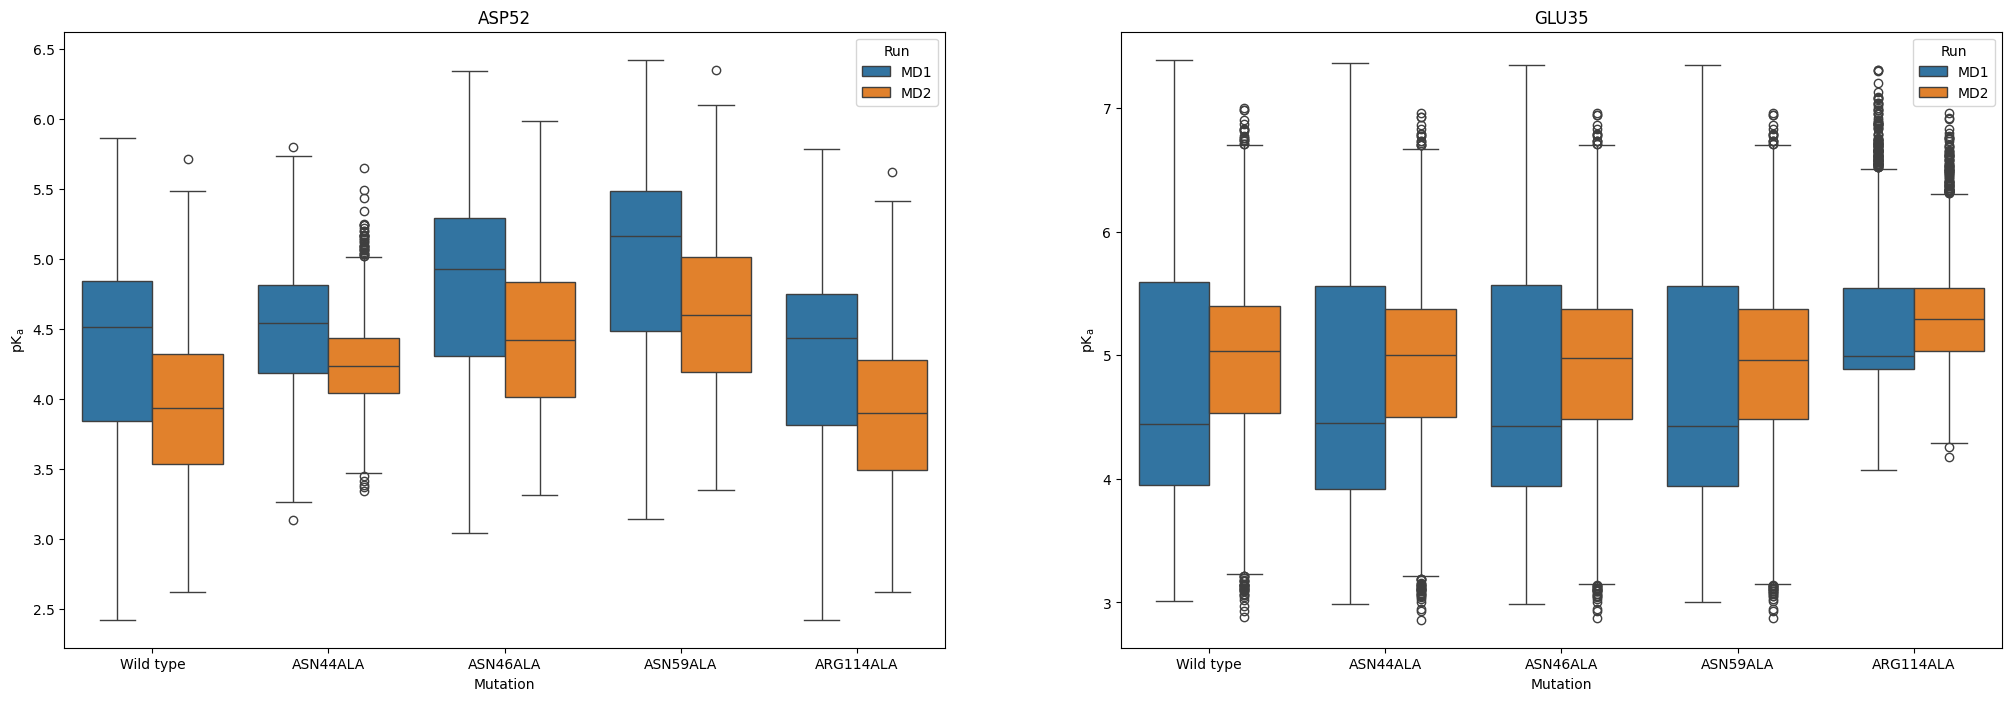

In [29]:
output_directory = 'output' 

mutant_df_list = [] 
mutation_dict = {'Wild type' : '', 
                 'ASN44ALA' : '_44', 
                 'ASN46ALA' : '_46',
                 'ASN59ALA' : '_59',
                 'ARG114ALA' : '_114'
                 } 
for idx in range(1,3): 
    for index, mutation in enumerate(mutation_dict.keys()): 
        df = pd.read_csv(f'{output_directory}/1AKI_md{idx}{mutation_dict[mutation]}/1AKI_md{idx}{mutation_dict[mutation]}_pka.csv') 
        df = df[['Time [ps]', 'ASP52', 'GLU35']] 
        df_melt = df.melt(id_vars='Time [ps]', var_name='Residues', value_name='pKa value') 
        df_melt['Run'] = f'MD{idx}' 
        df_melt['Mutation'] = mutation 
        mutant_df_list.append(df_melt) 

df_mutant = pd.concat(mutant_df_list) 

fig, ax = plt.subplots(1,2, figsize=(25,8)) 
for index, item in enumerate(['ASP52', 'GLU35']): 
    sns.boxplot(data=df_mutant[df_mutant['Residues']==item], x='Mutation', y='pKa value', hue='Run', ax=ax[index]) 
    ax[index].set_title(f'{item}') 
    ax[index].set_ylabel(r'pK${\rm_a}$')

# PC projection automated screening

Another function `analysis.PCProjectionScreening` can be used to automatically screen the projection provided by the user and the pKa of all ionisable residue.

- `output_filename`: `str`. The name of the output CSV file.

- `pka_file`: `str`. Path to the pKa CSV file.

- `projection_file`: `str`. Path to the projection CSV file. Please make sure it contains a column of Time and Projection value only (no column name needed). See the example format in files/1AKI_md1_pc1.csv

- `method`: `str`, `default=Pearson`. Method of computing the correlation, allow `Pearson` or `Spearman`.

Here we will perform an automated screening for the correlation between the p*K*<sub>a</sub> value of each ionisable residue and the projection of $C_\alpha$ coordinates of the MD1 trajectory on the first principal component.

In [30]:
from tripp.analysis import PCProjectionScreening

pKaCSV = 'output/1AKI_md1/1AKI_md1_pka.csv'
ProjectionCSV = 'files/1AKI_md1_pc1.csv'
output_directory = 'output/' 

PCProjectionScreening(output_filename=f'{output_directory}/1AKI_md1_pc1_projection_pKa_PearsonCorrelation.csv',
                      pka_file=pKaCSV,
                      projection_file=ProjectionCSV,
                      method='Pearson')

The correlation value can also be visualized in PyMOL as b-factors using our `Visualization` class.

In [31]:
from tripp import Visualization
file_directory = 'files'
output_directory = 'output' 
pymol_path = '/Applications/PyMOL.app/Contents/MacOS/MacPyMOL'

topology_file = f'{file_directory}/1AKI_minstr.pdb' 
pka_file = f'{output_directory}/1AKI_md1/1AKI_md1_pka.csv'
correlation_file = f'{output_directory}/1AKI_md1_pc1_projection_pKa_PearsonCorrelation.csv'

Corr_Vis = Visualization(structure=topology_file,
                          pka_file=pka_file,
                          correlation_file=correlation_file)
Corr_Vis.gen_pse(pymol_path=pymol_path, 
                    output=f'{output_directory}/1AKI_md1_pc1_projection_pKa_PearsonCorrelation', 
                    coloring_method='correlation', 
                    lower_limit=-1, 
                    upper_limit=1, 
                    color_palette='red_white_blue')

Your topology file contains no chain identity for at least one atom. Will add chain A for your whole system by default
Your topology file contains no formal charges. Will set formal charges to 0 for your whole system by default
output/1AKI_md1_pc1_projection_pKa_PearsonCorrelation_correlation.pdb
 PyMOL(TM) 3.0.1 - Incentive Product
 Copyright (C) Schrodinger, LLC
 
 This Executable Build integrates and extends Open-Source PyMOL.
 Detected 12 CPU cores.  Enabled multithreaded rendering.
